In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Read Dataset

In [2]:
df = pd.read_csv('text_submissions.csv')
df2 = pd.read_csv('text_comments.csv')

C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\2477808388.py:1: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('text_submissions.csv')
C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\2477808388.py:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('text_comments.csv')


Want to add another column that has the year posted

In [3]:
## If errors, just omit them
df['Date'] = pd.to_datetime(df['created_utc'], unit='s', errors='coerce')
df['Year'] = df['Date'].dt.year
df['selftext'] = df['selftext'].fillna('')

## If errors, just omit them
df2['Date'] = pd.to_datetime(df2['created_utc'], unit='s', errors='coerce')
df2['Year'] = df2['Date'].dt.year
df2['body'] = df2['body'].fillna('')

## Data Exploration

First we see how many times each of the 3 news sources are shared within data (both -2 and +2 on Allstates)

In [4]:
### First we have (-2)
left_result = pd.DataFrame(columns=['Year', 'Count'])
left_urls = ['alternet', 'buzzfeed', 'cnn', 'thedailybeast', 'democracynow', 'huffpost', 'theintercept', 'jacobin', 'motherjones', 'msn', 'newyorker', 'slate', 'vox']
for news_source in left_urls:
    url_pattern = f'https://.*{news_source}.*\.(com|org|co\.uk)'
    regex_df = df[df['selftext'].str.contains(url_pattern, regex=True)]
    grouped_df = regex_df.groupby(by='Year').size().reset_index(name='Count')
    grouped_df = grouped_df[['Year', 'Count']]
    left_result = left_result.append(grouped_df, ignore_index=True)
left_result = left_result.groupby('Year')['Count'].sum().reset_index(name='Total_Count')

### Second we have (+2)
right_result = pd.DataFrame(columns=['Year', 'Count'])
right_urls = ['theblaze', 'breitbart', 'dailycaller', 'dailymail', 'dailywire', 'federealist', 'foxnews', 'nationalreview', 'oann', 'spectator']
for news_source in right_urls:
    url_pattern = f'https://.*{news_source}.*\.(com|org|co\.uk)'
    regex_df = df[df['selftext'].str.contains(url_pattern, regex=True)]
    grouped_df = regex_df.groupby(by='Year').size().reset_index(name='Count')
    grouped_df = grouped_df[['Year', 'Count']]
    right_result = right_result.append(grouped_df, ignore_index=True)
right_result = right_result.groupby('Year')['Count'].sum().reset_index(name="Total_Count")

### First we have (-2)
left_result_comments = pd.DataFrame(columns=['Year', 'Count'])
for news_source in left_urls:
    url_pattern = f'https://.*{news_source}.*\.(com|org|co\.uk)'
    regex_df = df2[df2['body'].str.contains(url_pattern, regex=True)]
    grouped_df = regex_df.groupby(by='Year').size().reset_index(name='Count')
    grouped_df = grouped_df[['Year', 'Count']]
    left_result_comments = left_result_comments.append(grouped_df, ignore_index=True)
left_result_comments = left_result_comments.groupby('Year')['Count'].sum().reset_index(name='Total_Count')

### Second we have (+2)
right_result_comments = pd.DataFrame(columns=['Year', 'Count'])
for news_source in right_urls:
    url_pattern = f'https://.*{news_source}.*\.(com|org|co\.uk)'
    regex_df = df2[df2['body'].str.contains(url_pattern, regex=True)]
    grouped_df = regex_df.groupby(by='Year').size().reset_index(name='Count')
    grouped_df = grouped_df[['Year', 'Count']]
    right_result_comments = right_result_comments.append(grouped_df, ignore_index=True)
right_result_comments = right_result_comments.groupby('Year')['Count'].sum().reset_index(name="Total_Count")

C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\2156618318.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  regex_df = df[df['selftext'].str.contains(url_pattern, regex=True)]
C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\2156618318.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  left_result = left_result.append(grouped_df, ignore_index=True)
C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\2156618318.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  regex_df = df[df['selftext'].str.contains(url_pattern, regex=True)]
C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\2156618318.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

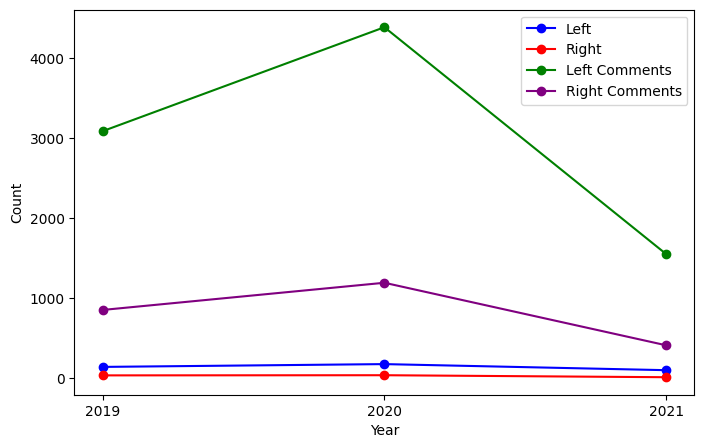

In [5]:
plt.figure(figsize=(8,5))
plt.plot(left_result['Year'], left_result['Total_Count'], label='Left', marker = 'o', color='blue')
plt.plot(right_result['Year'], right_result['Total_Count'], label='Right', marker='o', color='red')
plt.plot(left_result_comments['Year'], left_result_comments['Total_Count'], label='Left Comments', marker = 'o', color='green')
plt.plot(right_result_comments['Year'], right_result_comments['Total_Count'], label='Right Comments', marker='o', color='purple')
plt.xticks(left_result['Year'])
plt.legend()
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Lets do the same for (-1) and (+1) news sources

In [6]:
### First we have (-1)
left_result = pd.DataFrame(columns=['Year', 'Count'])
left_url_count = 0
left_urls = ['abcnews', 'theatlantic', 'bloomberg', 'cbsnews', 'economist', 'theguardian', 'nbcnews', 'nytimes', 'politico', 'time', 'usatoday', 'washingtonpost']
for news_source in left_urls:
    url_pattern = f'https://.*{news_source}.*\.(com|org|co\.uk)'
    regex_df = df[df['selftext'].str.contains(url_pattern, regex=True)]
    grouped_df = regex_df.groupby(by='Year').size().reset_index(name='Count')
    grouped_df = grouped_df[['Year', 'Count']]
    left_result = left_result.append(grouped_df, ignore_index=True)
left_result = left_result.groupby('Year')['Count'].sum().reset_index(name='Total_Count')

### Second we have (+1)
right_result = pd.DataFrame(columns=['Year', 'Count'])
right_url_count = 0
right_urls = ['theepochtimes', 'nypost', 'newsmax', 'reason', 'washingtonexaminer', 'washingtontimes']
for news_source in right_urls:
    url_pattern = f'https://.*{news_source}.*\.(com|org|co\.uk)'
    regex_df = df[df['selftext'].str.contains(url_pattern, regex=True)]
    grouped_df = regex_df.groupby(by='Year').size().reset_index(name='Count')
    grouped_df = grouped_df[['Year', 'Count']]
    right_result = right_result.append(grouped_df, ignore_index=True)
right_result = right_result.groupby('Year')['Count'].sum().reset_index(name="Total_Count")

### First we have (-1)
left_result_comments = pd.DataFrame(columns=['Year', 'Count'])
for news_source in left_urls:
    url_pattern = f'https://.*{news_source}.*\.(com|org|co\.uk)'
    regex_df = df2[df2['body'].str.contains(url_pattern, regex=True)]
    grouped_df = regex_df.groupby(by='Year').size().reset_index(name='Count')
    grouped_df = grouped_df[['Year', 'Count']]
    left_result_comments = left_result_comments.append(grouped_df, ignore_index=True)
left_result_comments = left_result_comments.groupby('Year')['Count'].sum().reset_index(name='Total_Count')

### Second we have (+1)
right_result_comments = pd.DataFrame(columns=['Year', 'Count'])
for news_source in right_urls:
    url_pattern = f'https://.*{news_source}.*\.(com|org|co\.uk)'
    regex_df = df2[df2['body'].str.contains(url_pattern, regex=True)]
    grouped_df = regex_df.groupby(by='Year').size().reset_index(name='Count')
    grouped_df = grouped_df[['Year', 'Count']]
    right_result_comments = right_result_comments.append(grouped_df, ignore_index=True)
right_result_comments = right_result_comments.groupby('Year')['Count'].sum().reset_index(name="Total_Count")

C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\530481710.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  regex_df = df[df['selftext'].str.contains(url_pattern, regex=True)]
C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\530481710.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  left_result = left_result.append(grouped_df, ignore_index=True)
C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\530481710.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  regex_df = df[df['selftext'].str.contains(url_pattern, regex=True)]
C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\530481710.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

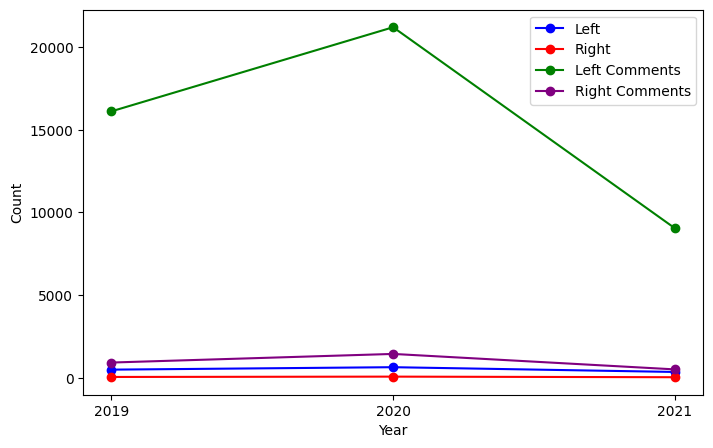

In [7]:
plt.figure(figsize=(8,5))
plt.plot(left_result['Year'], left_result['Total_Count'], label='Left', marker = 'o', color='blue')
plt.plot(right_result['Year'], right_result['Total_Count'], label='Right', marker='o', color='red')
plt.plot(left_result_comments['Year'], left_result_comments['Total_Count'], label='Left Comments', marker = 'o', color='green')
plt.plot(right_result_comments['Year'], right_result_comments['Total_Count'], label='Right Comments', marker='o', color='purple')
plt.xticks(left_result['Year'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

## Data Analysis

Now we try to find the top communities which share the most polarizing news sources

In [8]:
### First we have (-2)
left_result = pd.DataFrame(columns=['subreddit', 'Count'])
left_url_count = 0
left_urls = ['alternet', 'buzzfeed', 'cnn', 'thedailybeast', 'democracynow', 'huffpost', 'theintercept', 'jacobin', 'motherjones', 'msn', 'newyorker', 'slate', 'vox']
for news_source in left_urls:
    url_pattern = f'https://.*{news_source}.*\.(com|org|co\.uk)'
    regex_df = df[df['selftext'].str.contains(url_pattern, regex=True)]
    grouped_df = regex_df.groupby(by='subreddit').size().reset_index(name='Count')
    grouped_df = grouped_df[['subreddit', 'Count']]
    left_result = left_result.append(grouped_df, ignore_index=True)
left_result = left_result.groupby('subreddit')['Count'].sum().reset_index(name='Total_Count')

### Second we have (+2)
right_result = pd.DataFrame(columns=['subreddit', 'Count'])
right_url_count = 0
right_urls = ['theblaze', 'breitbart', 'dailycaller', 'dailymail', 'dailywire', 'federealist', 'foxnews', 'nationalreview', 'oann', 'spectator']
for news_source in right_urls:
    url_pattern = f'https://.*{news_source}.*\.(com|org|co\.uk)'
    regex_df = df[df['selftext'].str.contains(url_pattern, regex=True)]
    grouped_df = regex_df.groupby(by='subreddit').size().reset_index(name='Count')
    grouped_df = grouped_df[['subreddit', 'Count']]
    right_result = right_result.append(grouped_df, ignore_index=True)
right_result = right_result.groupby('subreddit')['Count'].sum().reset_index(name="Total_Count")

### First we have (-2)
left_result_comments = pd.DataFrame(columns=['subreddit', 'Count'])
left_url_count = 0
left_urls = ['alternet', 'buzzfeed', 'cnn', 'thedailybeast', 'democracynow', 'huffpost', 'theintercept', 'jacobin', 'motherjones', 'msn', 'newyorker', 'slate', 'vox']
for news_source in left_urls:
    url_pattern = f'https://.*{news_source}.*\.(com|org|co\.uk)'
    regex_df = df2[df2['body'].str.contains(url_pattern, regex=True)]
    grouped_df = regex_df.groupby(by='subreddit').size().reset_index(name='Count')
    grouped_df = grouped_df[['subreddit', 'Count']]
    left_result_comments = left_result_comments.append(grouped_df, ignore_index=True)
left_result_comments = left_result_comments.groupby('subreddit')['Count'].sum().reset_index(name='Total_Count')

### Second we have (+2)
right_result_comments = pd.DataFrame(columns=['subreddit', 'Count'])
right_url_count = 0
right_urls = ['theblaze', 'breitbart', 'dailycaller', 'dailymail', 'dailywire', 'federealist', 'foxnews', 'nationalreview', 'oann', 'spectator']
for news_source in right_urls:
    url_pattern = f'https://.*{news_source}.*\.(com|org|co\.uk)'
    regex_df = df2[df2['body'].str.contains(url_pattern, regex=True)]
    grouped_df = regex_df.groupby(by='subreddit').size().reset_index(name='Count')
    grouped_df = grouped_df[['subreddit', 'Count']]
    right_result_comments = right_result_comments.append(grouped_df, ignore_index=True)
right_result_comments = right_result_comments.groupby('subreddit')['Count'].sum().reset_index(name="Total_Count")

C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\2518105600.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  regex_df = df[df['selftext'].str.contains(url_pattern, regex=True)]
C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\2518105600.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  left_result = left_result.append(grouped_df, ignore_index=True)
C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\2518105600.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  regex_df = df[df['selftext'].str.contains(url_pattern, regex=True)]
C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\2518105600.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

Sort by the top 10 and plot them

Left (-2) Submissions Reddits

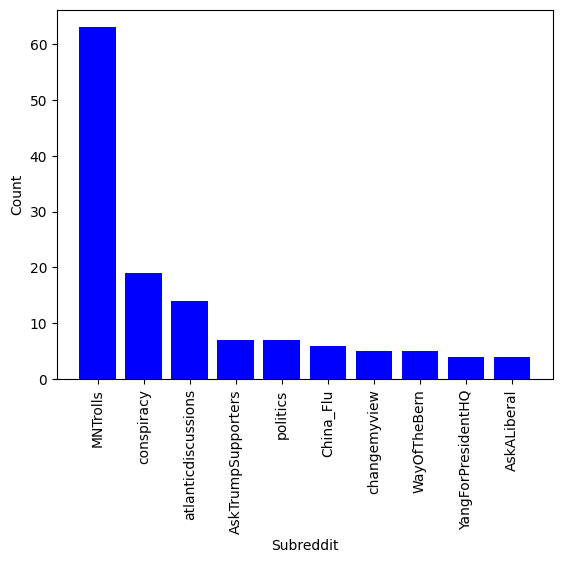

In [9]:
left_result = left_result.sort_values(by='Total_Count', ascending=False)
left_plot_main = left_result.head(10)
plt.bar(left_plot_main['subreddit'], left_plot_main['Total_Count'], color = 'blue')
plt.xticks(left_plot_main['subreddit'], rotation='vertical')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.show()

Left (-2) Comments Reddits

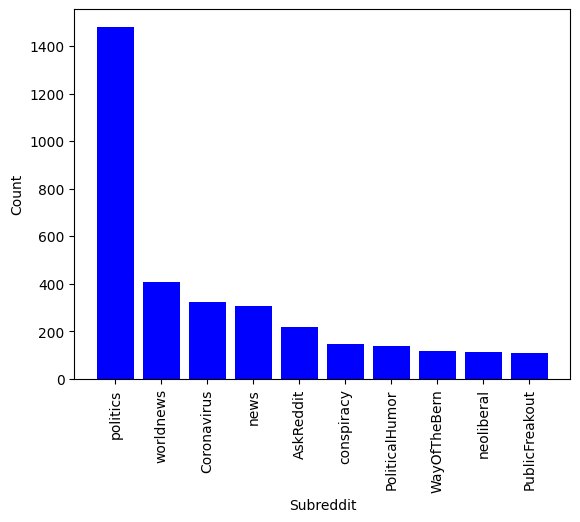

In [10]:
left_result_comments = left_result_comments.sort_values(by='Total_Count', ascending=False)
left_plot_main_comments = left_result_comments.head(10)
plt.bar(left_plot_main_comments['subreddit'], left_plot_main_comments['Total_Count'], color = 'blue')
plt.xticks(left_plot_main_comments['subreddit'], rotation='vertical')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.show()

Same for submissions (+2) news sources

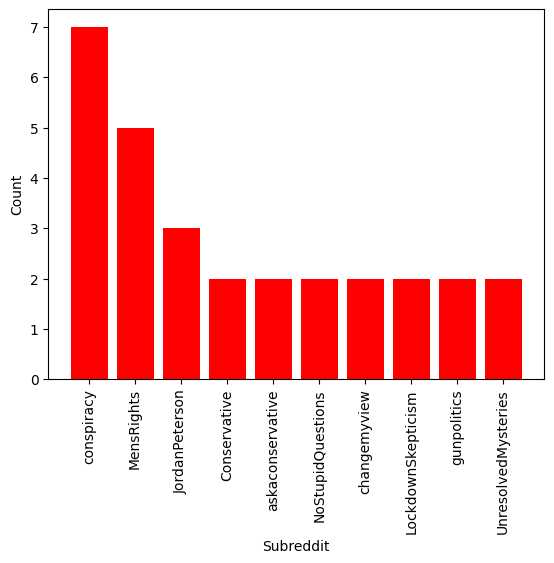

In [11]:
right_result = right_result.sort_values(by='Total_Count', ascending=False)
right_plot_main = right_result.head(10)
plt.bar(right_plot_main['subreddit'], right_plot_main['Total_Count'], color = 'red')
plt.xticks(right_plot_main['subreddit'], rotation='vertical')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.show()

Same for comments (+2) news sources

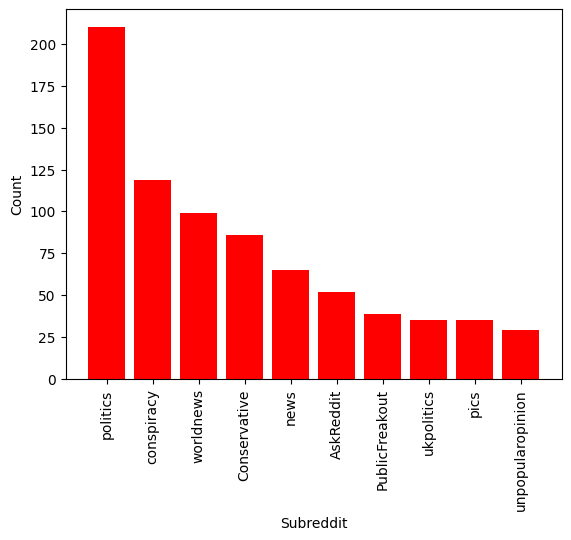

In [12]:
right_result_comments = right_result_comments.sort_values(by='Total_Count', ascending=False)
right_plot_main_comments = right_result_comments.head(10)
plt.bar(right_plot_main_comments['subreddit'], right_plot_main_comments['Total_Count'], color = 'red')
plt.xticks(right_plot_main_comments['subreddit'], rotation='vertical')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.show()

Out of interest do for (+1) and (-1) news sources as well

In [13]:
### First we have (-2)
left_result = pd.DataFrame(columns=['subreddit', 'Count'])
left_url_count = 0
left_urls = ['abcnews', 'theatlantic', 'bloomberg', 'cbsnews', 'economist', 'theguardian', 'nbcnews', 'nytimes', 'politico', 'time', 'usatoday', 'washingtonpost']
for news_source in left_urls:
    url_pattern = f'https://.*{news_source}.*\.(com|org|co\.uk)'
    regex_df = df[df['selftext'].str.contains(url_pattern, regex=True)]
    grouped_df = regex_df.groupby(by='subreddit').size().reset_index(name='Count')
    grouped_df = grouped_df[['subreddit', 'Count']]
    left_result = left_result.append(grouped_df, ignore_index=True)
left_result = left_result.groupby('subreddit')['Count'].sum().reset_index(name='Total_Count')

### Second we have (+2)
right_result = pd.DataFrame(columns=['subreddit', 'Count'])
right_url_count = 0
right_urls = ['theepochtimes', 'nypost', 'newsmax', 'reason', 'washingtonexaminer', 'washingtontimes']
for news_source in right_urls:
    url_pattern = f'https://.*{news_source}.*\.(com|org|co\.uk)'
    regex_df = df[df['selftext'].str.contains(url_pattern, regex=True)]
    grouped_df = regex_df.groupby(by='subreddit').size().reset_index(name='Count')
    grouped_df = grouped_df[['subreddit', 'Count']]
    right_result = right_result.append(grouped_df, ignore_index=True)
right_result = right_result.groupby('subreddit')['Count'].sum().reset_index(name="Total_Count")

C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\424306275.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  regex_df = df[df['selftext'].str.contains(url_pattern, regex=True)]
C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\424306275.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  left_result = left_result.append(grouped_df, ignore_index=True)
C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\424306275.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  regex_df = df[df['selftext'].str.contains(url_pattern, regex=True)]
C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\424306275.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

Sort and Plot (-1)

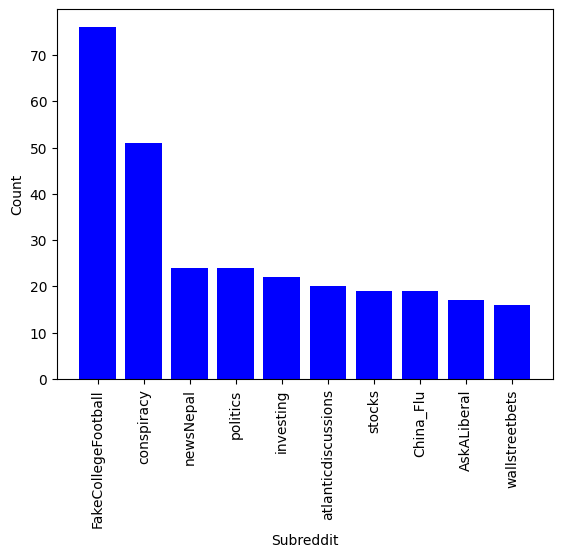

In [14]:
left_result = left_result.sort_values(by='Total_Count', ascending=False)
left_plot = left_result.head(10)
plt.bar(left_plot['subreddit'], left_plot['Total_Count'], color = 'blue')
plt.xticks(left_plot['subreddit'], rotation='vertical')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.show()

Sort and Plot (+1)

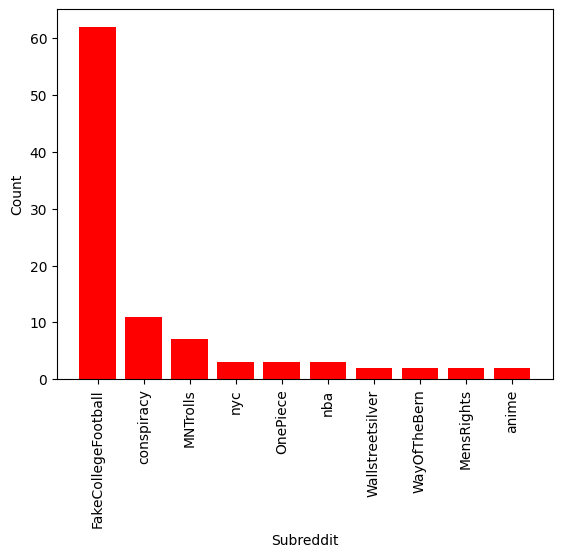

In [15]:
right_result = right_result.sort_values(by='Total_Count', ascending=False)
right_plot = right_result.head(10)
plt.bar(right_plot['subreddit'], right_plot['Total_Count'], color = 'red')
plt.xticks(right_plot['subreddit'], rotation='vertical')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.show()

In [16]:
right_subreddits = right_plot_main['subreddit'].tolist()
left_subreddits = left_plot_main['subreddit'].tolist()
right_subreddits_comments = right_plot_main_comments['subreddit'].tolist()
left_subreddits_comments = left_plot_main_comments['subreddit'].tolist()

Now we need to track activity on these subreddits over the 3 years in the dataset. First we can just do some naive activity tracking by number of submission in the subreddit.

In [17]:
#filter to only have submissions from these subreddits
right_subreddit_data = df[df['subreddit'].isin(right_subreddits) | df['subreddit'].isin(right_subreddits_comments)]
left_subreddit_data = df[df['subreddit'].isin(left_subreddits) | df['subreddit'].isin(left_subreddits_comments)]

right_subreddit_comments = df2[df2['subreddit'].isin(right_subreddits) | df2['subreddit'].isin(right_subreddits_comments)]
left_subreddit_comments = df2[df2['subreddit'].isin(left_subreddits) | df2['subreddit'].isin(left_subreddits_comments)]

#then we group by year and subreddit
right_grouped = right_subreddit_data.groupby(['subreddit', 'Year']).size().reset_index(name='Count')
left_grouped = left_subreddit_data.groupby(['subreddit', 'Year']).size().reset_index(name='Count')
right_comments_grouped = right_subreddit_comments.groupby(['subreddit', 'Year']).size().reset_index(name='Count')
left_comments_grouped = left_subreddit_comments.groupby(['subreddit', 'Year']).size().reset_index(name='Count')


Need to normalize for count to be per day since we do not have data for the entire year of 2021, only until June. Therefore we divide by the number of days per year in dataset. I.e 2019, 2020 counts will divide by 365, will 2021 will divide the count by 181, since 181 days from January 1st to June 30

In [18]:
import seaborn as sns
right_grouped['normalized_count'] = right_grouped.apply(lambda row : row['Count'] / 181.0 if row['Year'] == 2021 else row['Count'] / 365.0, axis=1)
left_grouped['normalized_count'] = left_grouped.apply(lambda row: row['Count'] / 181.0 if row['Year'] == 2021 else row['Count'] / 365.0, axis=1 )

right_comments_grouped['normalized_count'] = right_comments_grouped.apply(lambda row : row['Count'] / 181.0 if row['Year'] == 2021 else row['Count'] / 365.0, axis=1)
left_comments_grouped['normalized_count'] = left_comments_grouped.apply(lambda row: row['Count'] / 181.0 if row['Year'] == 2021 else row['Count'] / 365.0, axis=1 )

#2021 count / 2019 count
ratio = lambda group: group.iloc[-1]['normalized_count'] / group.iloc[0]['normalized_count'] if len(group) > 1 else None
right_activity = right_grouped.groupby('subreddit').apply(ratio).reset_index(name='result')
left_activity = left_grouped.groupby('subreddit').apply(ratio).reset_index(name='result')
right_comment_activity = right_comments_grouped.groupby('subreddit').apply(ratio).reset_index(name='result')
left_comment_activity = left_comments_grouped.groupby('subreddit').apply(ratio).reset_index(name='result')


Lets sort both data so we get the top 10 subreddits with the activity for both. 

In [19]:
#get top 10 unique subreddits with the highest count
unique = right_grouped.sort_values(by='normalized_count', ascending=False).drop_duplicates('subreddit', keep='first').head(10)['subreddit'].tolist()
right_grouped = right_grouped[right_grouped['subreddit'].isin(unique)]

unique = right_comments_grouped.sort_values(by='normalized_count', ascending=False).drop_duplicates('subreddit', keep='first').head(10)['subreddit'].tolist()
right_comments_grouped = right_comments_grouped[right_comments_grouped['subreddit'].isin(unique)]

unique = left_grouped.sort_values(by='normalized_count', ascending=False).drop_duplicates('subreddit', keep='first').head(10)['subreddit'].tolist()
left_grouped = left_grouped[left_grouped['subreddit'].isin(unique)]

unique = left_comments_grouped.sort_values(by='normalized_count', ascending=False).drop_duplicates('subreddit', keep='first').head(10)['subreddit'].tolist()
left_comments_grouped = left_comments_grouped[left_comments_grouped['subreddit'].isin(unique)]

We can plot the normalized activity of the top right subreddit

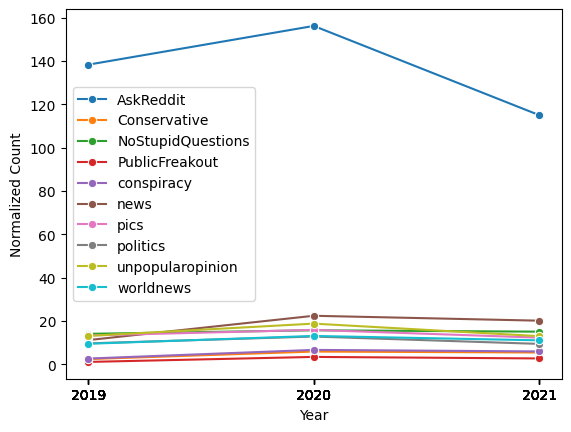

In [20]:
sns.lineplot(x='Year', y='normalized_count', hue='subreddit', data=right_grouped, marker='o')
plt.xlabel('Year')
plt.ylabel('Normalized Count')
plt.legend()
plt.xticks(right_grouped['Year'])
#plt.yscale('log')
plt.show()

Normalized activity of top right subreddits comments

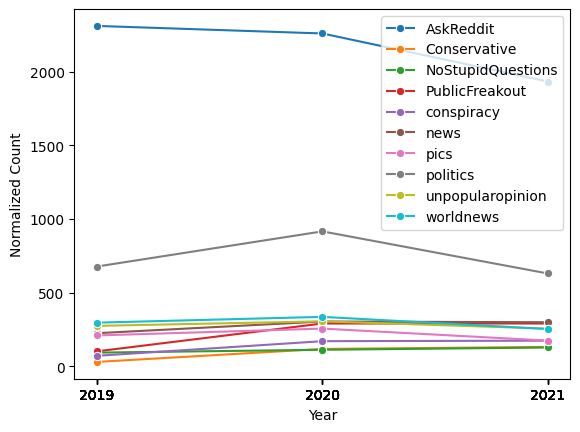

In [21]:
sns.lineplot(x='Year', y='normalized_count', hue='subreddit', data=right_comments_grouped, marker='o')
plt.xlabel('Year')
plt.ylabel('Normalized Count')
plt.legend()
plt.xticks(right_grouped['Year'])
#plt.yscale('log')
plt.show()

As well the for top left subreddits

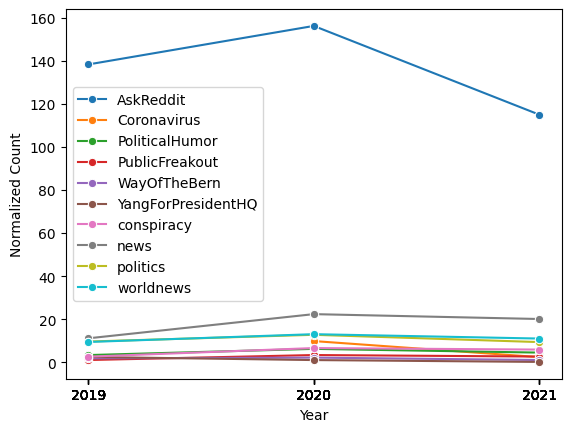

In [22]:
sns.lineplot(x='Year', y='normalized_count', hue='subreddit', data=left_grouped, marker='o')
plt.xlabel('Year')
plt.ylabel('Normalized Count')
plt.legend()
plt.xticks(left_grouped['Year'])
#plt.yscale('log')
plt.show()

Normalized activity of top left subreddits comments

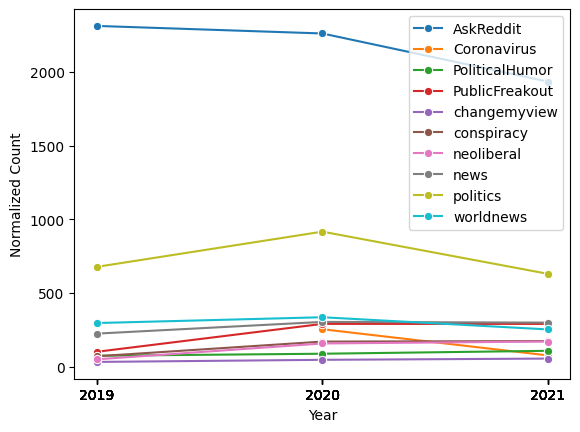

In [23]:
sns.lineplot(x='Year', y='normalized_count', hue='subreddit', data=left_comments_grouped, marker='o')
plt.xlabel('Year')
plt.ylabel('Normalized Count')
plt.legend()
plt.xticks(left_grouped['Year'])
#plt.yscale('log')
plt.show()

Considering both these plots contain the same subreddits which contribute a lot to activity, lets remove these, so we can analyze the trend over time of these subreddits to further reinforce my second research question of platform hopping.

First for submissions

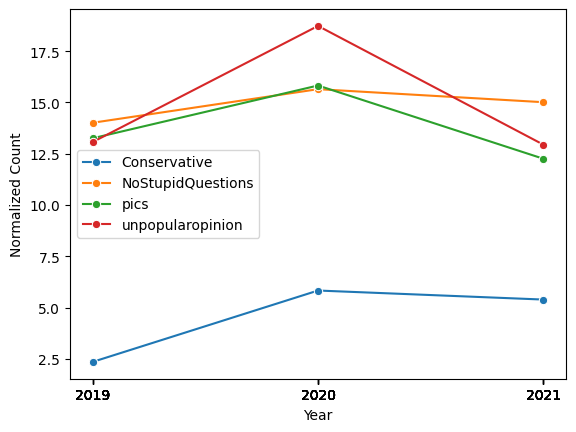

In [24]:
right_grouped_filtered = right_grouped[~right_grouped['subreddit'].isin(left_grouped['subreddit'])]
sns.lineplot(x='Year', y='normalized_count', hue='subreddit', data=right_grouped_filtered, marker='o')
plt.xlabel('Year')
plt.ylabel('Normalized Count')
plt.legend()
plt.xticks(left_grouped['Year'])
#plt.yscale('log')
plt.show()

And for comments as well

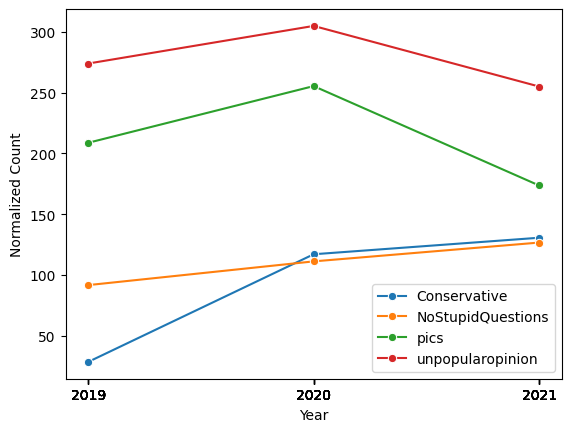

In [25]:
right_comments_grouped_filtered = right_comments_grouped[~right_comments_grouped['subreddit'].isin(left_comments_grouped['subreddit'])]
sns.lineplot(x='Year', y='normalized_count', hue='subreddit', data=right_comments_grouped_filtered, marker='o')
plt.xlabel('Year')
plt.ylabel('Normalized Count')
plt.legend()
plt.xticks(left_grouped['Year'])
#plt.yscale('log')
plt.show()

As seen from the graphs above, there were only 4 subreddits that were not common to both sides of the spectrum. 2 of these subreddits namely, r/pics and r/NoStupidQuestions seem to both be non-partisan subreddits. 

One subreddit that is most interesting to our analysis is r/Conservative, which is were we expect a large chunk of users to migrate to from the deplatformed subreddits. Evidently enough, we see this exactly happen with an almost 5x increase in activity from 2019 to 2020. This is in favour of the idea that users from these deplatformed subreddits have stayed within the platform. 

I have been lucky enough to get Reddit data of the deplatformed community, The_Donald and will compare if the activity difference.

### DISCLAIMER: I have not cleaned the data of potential NSFW text and in the notebook below I may print entries as sanity checks and testing. 

In [30]:
donald_df = pd.read_csv('thedonald_submissions.csv', error_bad_lines=False, encoding='utf-8')
donald_df['Date'] = pd.to_datetime(donald_df['created_utc'], unit='s', errors='coerce')
donald_df['Year'] = donald_df['Date'].dt.year
donald_year = donald_df.groupby(by='Year').size().reset_index(name='Count')

donald_df_comments = pd.read_csv('thedonald_comments.csv', error_bad_lines=False, encoding='utf-8')
donald_df_comments['Date'] = pd.to_datetime(donald_df_comments['created_utc'], unit='s', errors='coerce')
donald_df_comments['Year'] = donald_df_comments['Date'].dt.year

C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\3275326711.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  donald_df = pd.read_csv('thedonald_submissions.csv', error_bad_lines=False, encoding='utf-8')
C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\3275326711.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  donald_df_comments = pd.read_csv('thedonald_comments.csv', error_bad_lines=False, encoding='utf-8')


These value do match the increase other Right wing subreddits saw in 2020. As the sharp decrease in activity of the The_Donald occured due to deplatforming, other subreddits saw a 50% increase. This could indicate a shift of users to other subreddits, though this is only circumstantial.

Lets now do further analyis on these communities to see if we can better confirm if these communities left or shifted to other subreddits. I can do this by using sentiment analysis. I will analyze sentiment before 2020 and after. If we see a sharp change in the direction of the sentiment of The_Donald, this could indicate it users began being active in these communities. 

In [31]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lukas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Lets first analyze sentiment of The_Donald activity.

In [32]:
sia = SentimentIntensityAnalyzer()
donald_df['Sentiment'] = donald_df['title'].apply(lambda title: sia.polarity_scores(title)['compound'])
donald_sentiment_years = donald_df.groupby(by='Year')['Sentiment'].mean().reset_index()
donald_sentiment_years

,Year,Sentiment
0,2012,0.306160
1,2015,0.163373
2,2016,0.034735
3,2017,-0.024730
4,2018,0.049619
5,2019,0.086032
6,2020,0.037844
7,2021,0.112385
8,2022,0.124376


As well as for the comments

In [33]:
donald_df_comments['Sentiment'] = donald_df_comments['body'].apply(lambda title: sia.polarity_scores(title)['compound'])
donald_sentiment_comments_years = donald_df_comments.groupby(by='Year')['Sentiment'].mean().reset_index()
donald_sentiment_comments_years

,Year,Sentiment
0,2012,0.636900
1,2015,-0.278000
2,2016,-0.013103
3,2017,-0.040220
4,2018,0.010954
5,2019,0.033701
6,2020,0.005033
7,2021,0.012112
8,2022,0.011189


Sentiment over the years in right wing communities for submissions

In [34]:
right_text = right_subreddit_data[['title', 'Year']]
sia = SentimentIntensityAnalyzer()
right_text['Sentiment'] = right_text['title'].apply(lambda title: sia.polarity_scores(title)['compound'])
right_sentiment_year = right_text.groupby(by='Year')['Sentiment'].mean().reset_index()
right_sentiment_year

C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\3432371752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_text['Sentiment'] = right_text['title'].apply(lambda title: sia.polarity_scores(title)['compound'])


,Year,Sentiment
0,2019.0,0.009401
1,2020.0,0.010446
2,2021.0,0.009463


Sentiment over the years in right wing communities for comments

In [35]:
right_comments = right_subreddit_comments[['body', 'Year']]
sia = SentimentIntensityAnalyzer()
right_comments['Sentiment'] = right_comments['body'].apply(lambda title: sia.polarity_scores(title)['compound'])
right_comments_sentiment_year = right_comments.groupby(by='Year')['Sentiment'].mean().reset_index()
right_comments_sentiment_year

C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\3195411397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_comments['Sentiment'] = right_comments['body'].apply(lambda title: sia.polarity_scores(title)['compound'])


,Year,Sentiment
0,2019.0,0.030798
1,2020.0,0.026123
2,2021.0,0.025686


Sentiment over years in left wing communities for submissions

In [36]:
left_text = left_subreddit_data[['title', 'Year']]
sia = SentimentIntensityAnalyzer()
left_text['Sentiment'] = left_text['title'].apply(lambda title: sia.polarity_scores(title)['compound'])
left_sentiment_submissions_year = left_text.groupby(by='Year')['Sentiment'].mean().reset_index()
left_sentiment_submissions_year

C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\3397711655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_text['Sentiment'] = left_text['title'].apply(lambda title: sia.polarity_scores(title)['compound'])


,Year,Sentiment
0,2019.0,0.012886
1,2020.0,0.013243
2,2021.0,0.014577


Sentiment over years in left wing communities for comments

In [37]:
left_text = left_subreddit_comments[['body', 'Year']]
sia = SentimentIntensityAnalyzer()
left_text['Sentiment'] = left_text['body'].apply(lambda title: sia.polarity_scores(title)['compound'])
left_sentiment_year = left_text.groupby(by='Year')['Sentiment'].mean().reset_index()
left_sentiment_year

C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\2448777985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_text['Sentiment'] = left_text['body'].apply(lambda title: sia.polarity_scores(title)['compound'])


,Year,Sentiment
0,2019.0,0.028252
1,2020.0,0.022348
2,2021.0,0.020083


C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\3450677875.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  donald_sentiment_subset = donald_sentiment_subset[donald_sentiment_years['Year'] <= 2020]
C:\Users\Lukas\AppData\Local\Temp\ipykernel_25216\3450677875.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  donald_sentiment_comments_subset = donald_sentiment_comments_subset[donald_sentiment_comments_years['Year'] <= 2020]


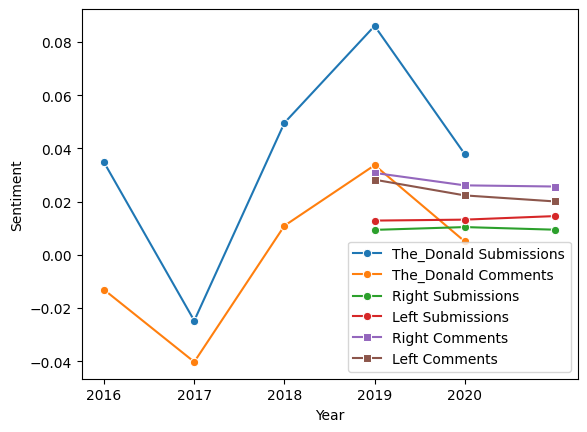

In [38]:
donald_sentiment_subset = donald_sentiment_years[donald_sentiment_years['Year'] >= 2016]
donald_sentiment_subset = donald_sentiment_subset[donald_sentiment_years['Year'] <= 2020]
donald_sentiment_comments_subset = donald_sentiment_comments_years[donald_sentiment_comments_years['Year'] >= 2016]
donald_sentiment_comments_subset = donald_sentiment_comments_subset[donald_sentiment_comments_years['Year'] <= 2020]
sns.lineplot(x='Year', y='Sentiment', data=donald_sentiment_subset, label='The_Donald Submissions', marker='o')
sns.lineplot(x='Year', y='Sentiment', data=donald_sentiment_comments_subset, label='The_Donald Comments', marker='o')
sns.lineplot(x='Year', y='Sentiment', data=right_sentiment_year, label='Right Submissions', marker='o')
sns.lineplot(x='Year', y='Sentiment', data=left_sentiment_submissions_year, label='Left Submissions', marker='o')
sns.lineplot(x='Year', y='Sentiment', data=right_comments_sentiment_year, label='Right Comments', marker='s')
sns.lineplot(x='Year', y='Sentiment', data=left_sentiment_year, label='Left Comments', marker='s')
plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.legend()
plt.xticks(donald_sentiment_subset['Year'])
plt.show()

The sentiment from The_Donald subreddit seem to be opposite from the right subreddits identified, which can indicate that the members did not move over to these communities because the sentiment rating went in the other direction from The_Donald.

The last piece of analysis will be looking into temporal analysis of the comments in The_Donald subreddit. Here we decide to use comments rather then submissions because users would likely communicate a platform shift in the comments rather than making a post. Assuming users would commmunicate to each other the platforms they could be potentially moving to, I will use a word bank to determine whether there was an intent of moving to another website. 

In [50]:
donald_comments = pd.read_csv('thedonald_comments.csv')
donald_comments['Date'] = pd.to_datetime(donald_comments['created_utc'], unit='s', errors='coerce')
donald_comments['Year'] = donald_comments['Date'].dt.year

migration_terms = ['migrate', 'move', 'move to', 'moving', 'transfer', 'new website', 'change website']

def has_migration_term(text):
    return any(word in text for word in migration_terms)

donald_comments['migrate'] = donald_comments['body'].apply(lambda text: 1 if has_migration_term(text) else 0)

grouped_migration = donald_comments.groupby('Year')['migrate'].sum().reset_index(name='Migration_Sum')

Visualize how migration is mentioned during the years of the subreddits existence.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


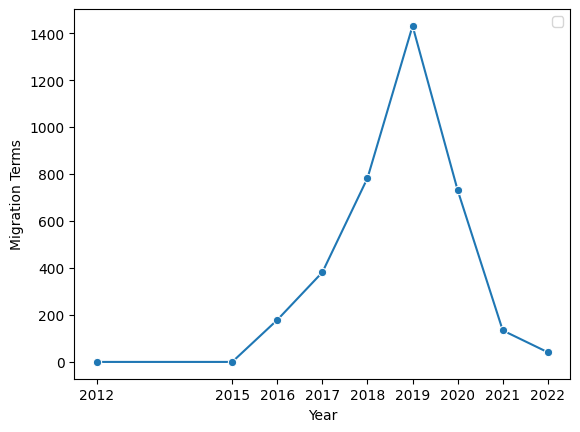

In [51]:
sns.lineplot(x='Year', y='Migration_Sum', data=grouped_migration, marker='o')
plt.xlabel('Year')
plt.ylabel('Migration Terms')
plt.legend()
plt.xticks(grouped_migration['Year'])
plt.show()

Given that the subreddit was deplatformed in the middle of 2020, this trend is indicative of users planning to move away, but it is unclear whether this means to move to another subreddit or another platform entirely. Lets try to determine this. 

I researched a method called, Named Entity Recognition, which given a sentence will help determine the destination of where users are moving. I will be using this on all the text that has indication of migration terms.

Remark: I downloaded the spacy core_web_sm model via command `python -m spacy download en_core_web_sm`

In [54]:
import spacy
nlp = spacy.load('en_core_web_sm')

migration_comments = donald_comments[donald_comments['migrate'] == 1]

def get_destination(text):
    doc = nlp(text)
    locations = [ent.text for ent in doc.ents if ent.label_ in ['ORG', 'LOC']]
    return locations

migration_comments['Destinations'] = migration_comments['body'].apply(get_destination)

all_locations = [location for sublist in migration_comments['Destinations'] for location in sublist]
location_count = pd.Series(all_locations).value_counts().reset_index()
location_count.columns = ['Location', 'Occurance']
sorted_location_counts = location_count.sort_values(by='Occurance', ascending=False)

C:\Users\Lukas\AppData\Local\Temp\ipykernel_22096\3073202617.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration_comments['Destinations'] = migration_comments['body'].apply(get_destination)


In [55]:
sorted_location_counts.head(10)

,Location,Occurance
0,Trump,389
1,"^^bot, ^^beep ^^boop ^^|",75
2,BLM,43
3,CNN,29
4,FBI,24
5,Obama,17
6,AMI,15
7,ISIS,13
8,Sub)](https://np.reddit.com,13
10,Migrants Climb Border Fence During,12


This analysis did not prove fruitful. It is possible that the migration terms used were to lose and included text that was not in the context of moving platforms. 

### Closing Remarks
Overall the data is inconclusive and favouring that the users were not retained within Reddit. On one hand the amount of activity lost by these main subreddits that got deplatformed do not seem to appear in the further right subreddits that were shown in the analysis. Furthermore, through NLP analysis it does seem like there was an unusual amount of activity with migration terms which indicates that there was an inititive to move before the deplatforming of the subreddit happened. Overall the data does indicate that there was a platform shift for the users in The_Donald but not conclusively.  